# Project 2: Solution - exploratory analysis plan

## Exploratory Analysis Plan

### Dataset review

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
import seaborn as sns

df = pd.read_csv("./assets/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


#### Improving data set

In [64]:
print('Size of data set: ', len(df.index))
print('{} missing admit records'.format(len(df.index) - df.admit.notnull().sum()))
print('{} missing GRE records.'.format(len(df.index) - df.gre.notnull().sum()))
print('{} missing prestige records'.format(len(df.index) - df.gpa.notnull().sum()))
print('{} missing GPA records'.format(len(df.index) - df.prestige.notnull().sum()))

Size of data set:  400
0 missing admit records
2 missing GRE records.
2 missing prestige records
1 missing GPA records


In [65]:
df[pd.isnull(df.gre)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [66]:
df[pd.isnull(df.gpa)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


Based on above observations:

In [99]:
df.drop(df[pd.isnull(df.gre) & pd.isnull(df.gpa)].index, inplace=True)
df.drop(df[pd.isnull(df.gpa) & pd.isnull(df.prestige)].index, inplace=True)
df.loc[pd.isnull(df.gre), 'gre'] = df.gre.median()

In [102]:
df.count()

admit       398
gre         398
gpa         398
prestige    398
dtype: int64

#### Descriptive statistics

In [104]:
df.describe()

,admit,gre,gpa,prestige
count,398.000000,398.000000,398.00000,398.000000
mean,0.316583,587.839196,3.39093,2.487437
std,0.465729,115.572627,0.38063,0.946207
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Data distribution

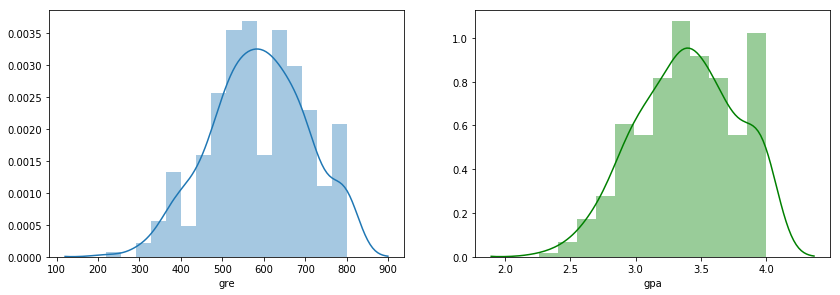

In [112]:
plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
sns.distplot(df.gre)
plt.subplot(2, 2, 2)
sns.distplot(df.gpa, color = 'green')

In [122]:
print('GRE distribution skew: {} and kartosis: {}'.format(df.gre.skew().round(6), df.gre.kurt().round(6)))
print('GPA distribution skew: {} and kartosis: {}'.format(df.gpa.skew().round(6), df.gpa.kurt().round(6)))

GRE distribution skew: -0.145713 and kartosis: -0.32628
GPA distribution skew: -0.211765 and kartosis: -0.574623


*Sidenote: how can I describe such distributions*

In [176]:
lnGRE = np.log(df.gre)
lnGRE.head()
#sns.distplot(pd.to_numeric(lnGRE, downcast='float'))

0    5.940171
1    6.492240
2    6.684612
3    6.461468
4    6.253829
Name: gre, dtype: float64

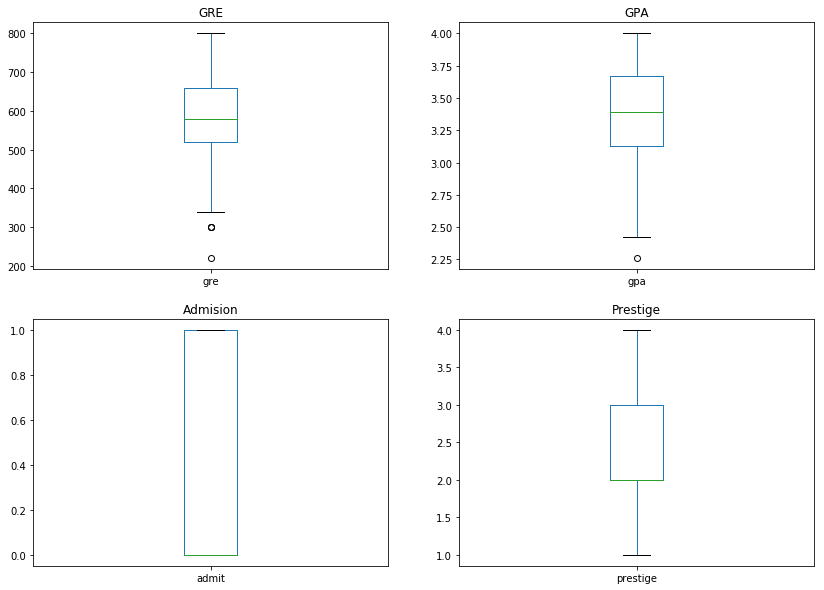

In [128]:
plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
df['gre'].plot(kind = 'box', title='GRE')
plt.subplot(2, 2, 2)
df['gpa'].plot(kind = 'box', title='GPA')
plt.subplot(2, 2, 3)
df['admit'].plot(kind = 'box', title='Admision')
plt.subplot(2, 2, 4)
df['prestige'].plot(kind = 'box', title='Prestige')

#### Covariance matrix

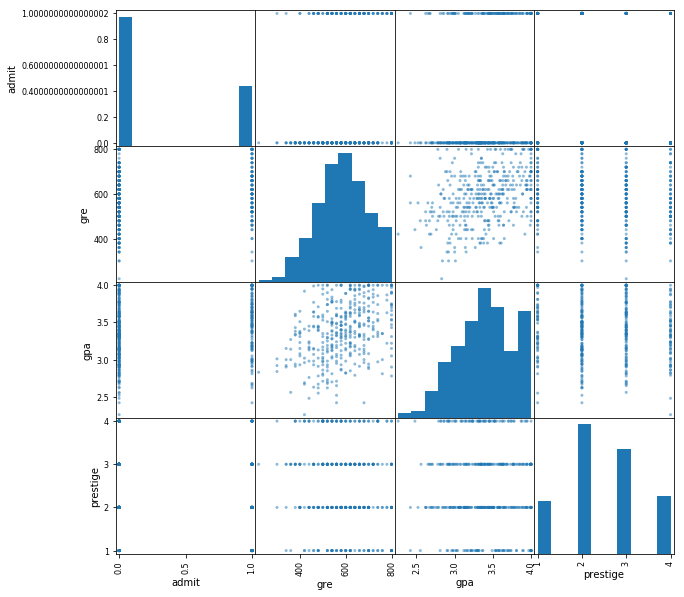

In [133]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10));

In [135]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181212,0.175952,-0.242455
gre,0.181212,1.000000,0.381735,-0.124402
gpa,0.175952,0.381735,1.000000,-0.059031
prestige,-0.242455,-0.124402,-0.059031,1.000000


In [145]:
lm = smf.ols('admit ~ prestige', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     24.56
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           1.07e-06
Time:                        00:37:13   Log-Likelihood:                -248.52
No. Observations:                 399   AIC:                             501.0
Df Residuals:                     397   BIC:                             509.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6112      0.064      9.585      0.000       0.486       0.737
prestige      -0.1188      0.024     -4.955      0.000      -0.166      -0.072
==============================================================================
Omnibus:                      277.527   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.297
Skew:                           0.726   Prob(JB):                     1.33e-13
Kurtosis:                       1.793   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Issues and/or limitations

* Admit and prestige represents categorical values 
* Low covariance for prestige suggests very low corelation with GRE & GPA results.